In [1]:
#Importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

#%matplotlib inline sets the backend of matplotlib to the 'inline' backend: With this backend, the 
#output of plotting commands is displayed inline within frontends like the Jupyter notebook, directly 
#below the code cell that produced it. The resulting plots will then also be stored in the notebook document.

In [2]:
#Reading the excel file
data=pd.read_csv(r"E:\Backup 14.03.2021\Desktop\Imarticus Post\DSP-42&24\Python\Mall_Customers.csv")

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
data.corr()
#corr() is used to find the pairwise correlation of all columns in the dataframe. Any na values are 
#automatically excluded. For any non-numeric data type columns in the dataframe it is ignored. 
#Note: The correlation of a variable with itself is 1.

#A correlation coefficient is used in statistics to describe a pattern or relationship between two
#variables. A negative correlation describes the extent to which two variables move in opposite
#directions. For example, for two variables, X and Y, an increase in X is associated with a decrease
#in Y

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

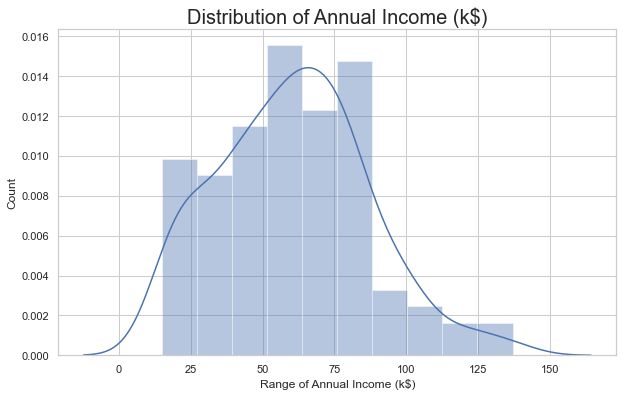

In [6]:
#Distribution of Annnual Income

plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(data['Annual Income (k$)'])
plt.title('Distribution of Annual Income (k$)', fontsize = 20)
plt.xlabel('Range of Annual Income (k$)')
plt.ylabel('Count')
#The seaborn. distplot() function is used to plot the distplot. The distplot represents the univariate
#distribution of data i.e. data distribution of a variable against the density distribution.

#Most of the annual income falls between 50K to 85K

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

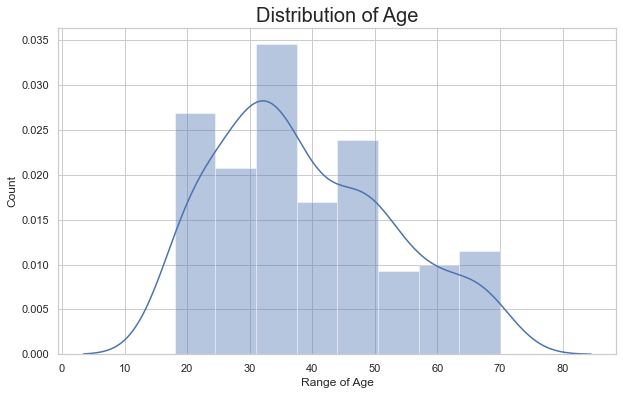

In [7]:
#Distribution of age

plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(data['Age'])
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')

#There are customers of a wide variety of ages

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

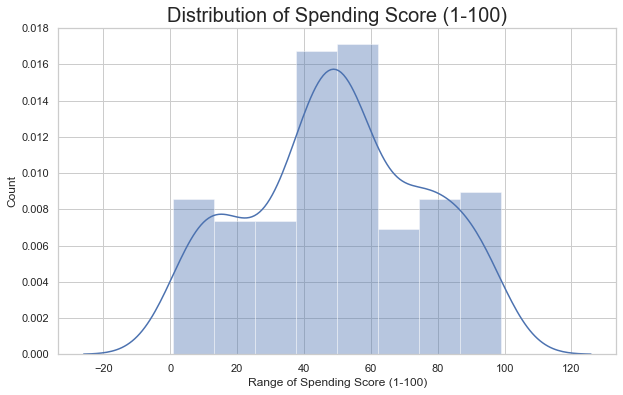

In [8]:
#Distribution of spending score

plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(data['Spending Score (1-100)'])
plt.title('Distribution of Spending Score (1-100)', fontsize = 20)
plt.xlabel('Range of Spending Score (1-100)')
plt.ylabel('Count')

#The maximum spending score is in the range of 40 to 60

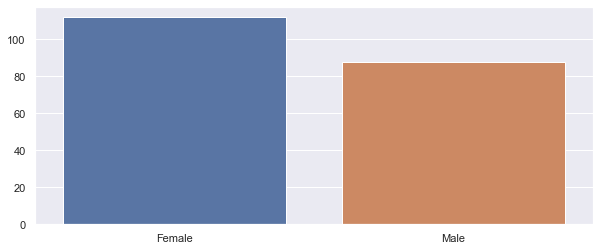

In [9]:
#Gender Analysis

genders = data.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

#More female customers than male

In [10]:
#Clustering based on 2 features
#We take just the Annual Income and Spending score

df1=data[["CustomerID","Gender","Age","Annual Income (k$)","Spending Score (1-100)"]]
X=df1[["Annual Income (k$)","Spending Score (1-100)"]]
#The input data
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


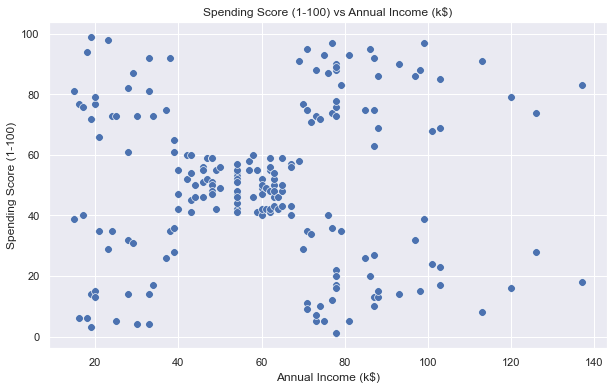

In [25]:
#Scatterplot of the input data

plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',  data = X  ,s = 60 )
#s - size in points^2. It is a scalar or an array of the same length as x and y.
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()
#The data does seem to hold some patterns

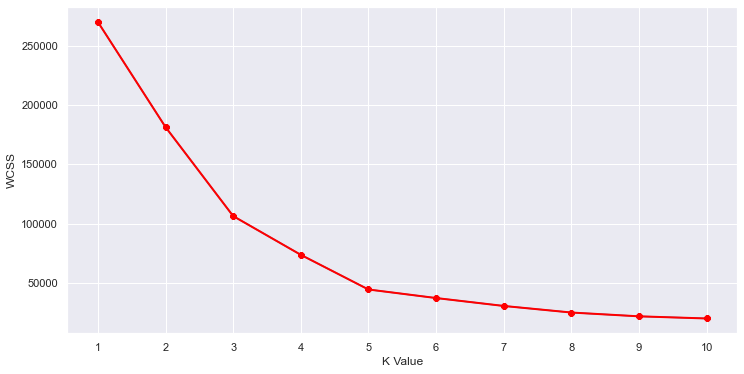

In [26]:
#Importing KMeans from sklearn
from sklearn.cluster import KMeans
#Now we calculate the Within Cluster Sum of Squared Errors (WSS) for different values of k. Next, we
#choose the k for which WSS first starts to diminish. This value of K gives us the best number of
#clusters to make from the raw data.
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
#n_clusters - The number of clusters to form as well as the number of centroids to generate   
    km.fit(X)
    wcss.append(km.inertia_)
#inertia_ -Sum of squared distances of samples to their closest cluster center    
#The elbow curve
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [27]:
#Taking 5 clusters
km1=KMeans(n_clusters=5)
#Fitting the input data
km1.fit(X)
#predicting the labels of the input data
y=km1.predict(X)
#adding the labels to a column named label
df1["label"] = y
#The new dataframe with the clustering done
df1.head()
#The labels added to the data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


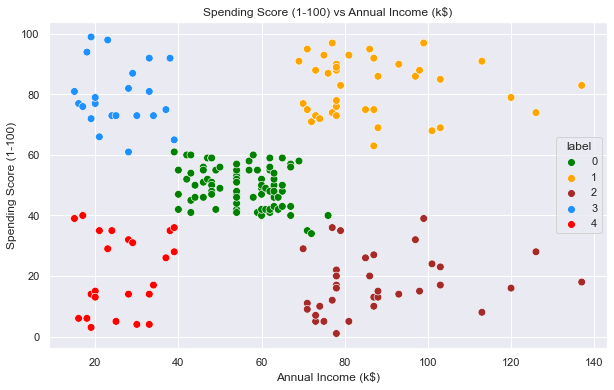

In [28]:
#Scatterplot of the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',hue="label",  
                 palette=['green','orange','brown','dodgerblue','red'], legend='full',data = df1  ,s = 60)
#We use the combination of hue and pallete to color the data points in scatter plot
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

#We can clearly see that 5 different clusters have been formed from the data. The red cluster is the
#customers with the least income and least spending score, similarly, the blue cluster is the
#customers with the most income and most spending score

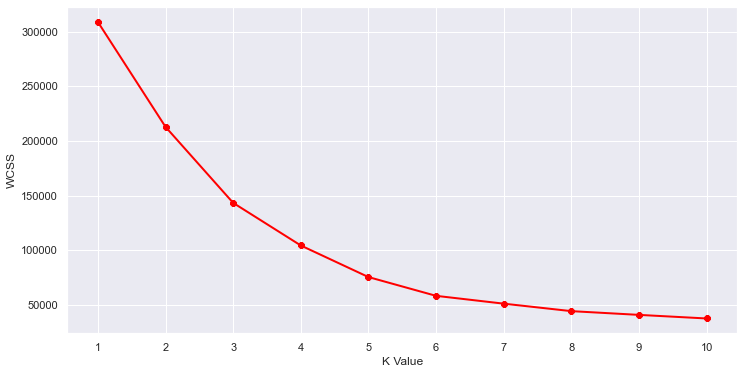

In [38]:
#k-Means Clustering on the basis of 3D data
#Now, we shall be working on 3 types of data. Apart from the spending score and annual income of
#customers, we shall also take in the age of the customers
#Taking the features
df2=data[["CustomerID","Gender","Age","Annual Income (k$)","Spending Score (1-100)"]]
X2=df2[["Age","Annual Income (k$)","Spending Score (1-100)"]]
#Now we calculate the Within Cluster Sum of Squared Errors (WSS) for different values of k.
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
#k-means++ - selects initial cluster centers for k-mean clustering in a smart way to speed up
#convergence     
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
#Marker is a special way of handling markers in graphs.
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

#Here can assume that K=5 will be a good value

In [41]:
#We choose the k for which WSS starts to diminish
km2 = KMeans(n_clusters=5)
y2 = km.fit_predict(X2)
df2["label"] = y2
#The data with labels
df2.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,7
1,2,Male,21,15,81,0
2,3,Female,20,16,6,5
3,4,Female,23,16,77,0
4,5,Female,31,17,40,7


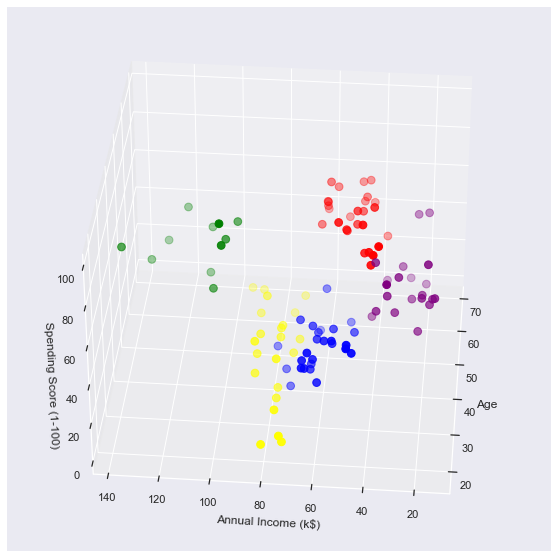

In [44]:
#3D Plot as we did the clustering on the basis of 3 input features
fig=plt.figure(figsize=(20,10))
ax=fig.add_subplot(111, projection='3d')
#subplot() function adds subplot to a current figure at the specified grid position
#Three integers (nrows, ncols, index). The subplot will take the index position on a grid with nrows
#rows and ncols columns. index starts at 1 in the upper left corner and increases to the right.
ax.scatter(df2.Age[df2.label == 0], df2["Annual Income (k$)"][df2.label == 0],
           df2["Spending Score (1-100)"][df2.label == 0], c='purple', s=60)
ax.scatter(df2.Age[df2.label == 1], df2["Annual Income (k$)"][df2.label == 1], df2["Spending Score (1-100)"][df2.label == 1], c='red', s=60)
ax.scatter(df2.Age[df2.label == 2], df2["Annual Income (k$)"][df2.label == 2], df2["Spending Score (1-100)"][df2.label == 2], c='blue', s=60)
ax.scatter(df2.Age[df2.label == 3], df2["Annual Income (k$)"][df2.label == 3], df2["Spending Score (1-100)"][df2.label == 3], c='green', s=60)
ax.scatter(df2.Age[df2.label == 4], df2["Annual Income (k$)"][df2.label == 4], df2["Spending Score (1-100)"][df2.label == 4], c='yellow', s=60)
ax.view_init(35, 185)
#Use view_init() can be used to rotate the axes programmatically
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

#What we get is a 3D plot. Now, if we want to know the customer IDs, we can do that too

In [51]:
cust1=df2[df2["label"]==1]
print('Number of customer in 1st group=', len(cust1))
print('They are -', cust1["CustomerID"].values)
print("--------------------------------------------")
cust2=df2[df2["label"]==2]
print('Number of customer in 2nd group=', len(cust2))
print('They are -', cust2["CustomerID"].values)
print("--------------------------------------------")
cust3=df2[df2["label"]==0]
print('Number of customer in 3rd group=', len(cust3))
print('They are -', cust3["CustomerID"].values)
print("--------------------------------------------")
cust4=df2[df2["label"]==3]
print('Number of customer in 4th group=', len(cust4))
print('They are -', cust4["CustomerID"].values)
print("--------------------------------------------")
cust5=df2[df2["label"]==4]
print('Number of customer in 5th group=', len(cust5))
print('They are -', cust5["CustomerID"].values)
print("--------------------------------------------")

Number of customer in 1st group= 27
They are - [ 41  47  51  54  55  57  58  60  61  63  64  65  68  71  73  74  75  81
  83  87  91 103 107 109 110 111 117]
--------------------------------------------
Number of customer in 2nd group= 26
They are - [ 59  62  66  69  70  76  79  85  88  89  92  95  96  98 100 101 104 106
 112 114 115 116 121 125 133 143]
--------------------------------------------
Number of customer in 3rd group= 21
They are - [ 2  4  6  8 10 12 14 16 18 20 22 24 26 30 32 34 36 38 40 42 46]
--------------------------------------------
Number of customer in 4th group= 11
They are - [180 182 184 186 188 190 192 194 196 198 200]
--------------------------------------------
Number of customer in 5th group= 22
They are - [129 131 135 137 139 141 145 149 151 153 155 157 159 163 165 167 169 171
 173 175 177 179]
--------------------------------------------
